# HMDA Data Challenge 
#### Nathan Zhang
#### May 2018

## Package Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.plotly as py
import plotly.figure_factory as ff

## Data import

In [2]:
loan_data = pd.read_csv('/Users/nzhang/OneDrive/Data/capital_one_data_challenge/2012_to_2014_loans_data.csv')
inst_data = pd.read_csv('/Users/nzhang/OneDrive/Data/capital_one_data_challenge/2012_to_2014_institutions_data.csv')
print('Dimension of loan data: ' + str(loan_data.shape) + '\nDimension of institution data: ' + str(inst_data.shape))

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning:

Columns (3,4,5,7,8,9,12) have mixed types. Specify dtype option on import or set low_memory=False.



Dimension of loan data: (1321158, 24)
Dimension of institution data: (21655, 12)


## Data Merge

In [3]:
loan_cols = list(loan_data.columns)
inst_cols = list(inst_data.columns)
share_cols = list(set(loan_cols).intersection(inst_cols))

merge_data = loan_data.merge(inst_data, on=share_cols, how='left')
merge_data.head()

,Agency_Code,Applicant_Income_000,As_of_Year,Census_Tract_Number,County_Code,FFIEC_Median_Family_Income,Loan_Amount_000,MSA_MD,Number_of_Owner_Occupied_Units,Respondent_ID,...,Conventional_Conforming_Flag,Respondent_Name_TS,Respondent_City_TS,Respondent_State_TS,Respondent_ZIP_Code,Parent_Name_TS,Parent_City_TS,Parent_State_TS,Parent_ZIP_Code,Assets_000_Panel
0,3,0084,2012,0207.00,079,00054900,94,16620,00001545,0000000384,...,Y,THE OHIO VALLEY BANK COMPANY,GALLIPOLIS,OH,45631,OHIO VALLEY BANC CORP,GALLIPOLIS,OH,45631,793399.0
1,3,0084,2012,9556.00,043,00054900,133,16620,00001548,0000000384,...,Y,THE OHIO VALLEY BANK COMPANY,GALLIPOLIS,OH,45631,OHIO VALLEY BANC CORP,GALLIPOLIS,OH,45631,793399.0
2,3,0053,2012,9556.00,043,00054900,70,16620,00001548,0000000384,...,Y,THE OHIO VALLEY BANK COMPANY,GALLIPOLIS,OH,45631,OHIO VALLEY BANC CORP,GALLIPOLIS,OH,45631,793399.0
3,3,0085,2012,0206.01,079,00054900,102,16620,00001935,0000000384,...,Y,THE OHIO VALLEY BANK COMPANY,GALLIPOLIS,OH,45631,OHIO VALLEY BANC CORP,GALLIPOLIS,OH,45631,793399.0
4,3,0038,2012,0107.01,039,00054900,112,16620,00001492,0000000384,...,Y,THE OHIO VALLEY BANK COMPANY,GALLIPOLIS,OH,45631,OHIO VALLEY BANC CORP,GALLIPOLIS,OH,45631,793399.0


## Exploratory Data Analysis

In [4]:
# Take a look at the features and their types
merge_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1321158 entries, 0 to 1321157
Data columns (total 33 columns):
Agency_Code                       1321158 non-null int64
Applicant_Income_000              1321158 non-null object
As_of_Year                        1321158 non-null int64
Census_Tract_Number               1321158 non-null object
County_Code                       1321158 non-null object
FFIEC_Median_Family_Income        1321158 non-null object
Loan_Amount_000                   1321158 non-null int64
MSA_MD                            1321158 non-null object
Number_of_Owner_Occupied_Units    1321158 non-null object
Respondent_ID                     1321158 non-null object
Sequence_Number                   1321158 non-null int64
State_Code                        1321158 non-null int64
Tract_to_MSA_MD_Income_Pct        1320258 non-null object
MSA_MD_Description                1225941 non-null object
Loan_Purpose_Description          1321158 non-null object
Agency_Code_Descriptio

There are a few numerical variables; however Agency_Code and State_Code should be treated as alphabetic variables, and Applicant_Income_000 and Tract_to_MSA_MD_Income_Pct should be treated as numerical variables.

In [5]:
# Number of null values and their portions
null_info = pd.DataFrame([merge_data.isnull().sum().astype(str), 
                          round(merge_data.isnull().sum()/merge_data.shape[0]*100,2).astype(str)+'%']).T
null_info.columns=['num_null', 'pct_null']
null_info

,num_null,pct_null
Agency_Code,0,0.0%
Applicant_Income_000,0,0.0%
As_of_Year,0,0.0%
Census_Tract_Number,0,0.0%
County_Code,0,0.0%
FFIEC_Median_Family_Income,0,0.0%
Loan_Amount_000,0,0.0%
MSA_MD,0,0.0%
Number_of_Owner_Occupied_Units,0,0.0%
Respondent_ID,0,0.0%


There are columns w/ nulls in the data. Note there are also many "NA" entries which should be treated as nulls as well.

### Deeper look into variables

#### *Year Issued*

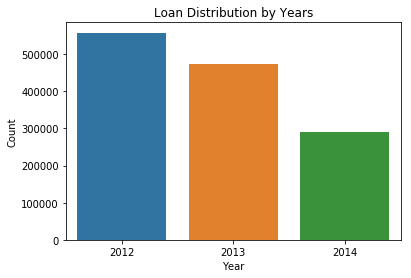

In [6]:
vc = merge_data['As_of_Year'].value_counts()

sns.barplot(x=vc.index, y=vc.values)
plt.title('Loan Distribution by Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

The number of loans has a continuously decreasing trend from 557,888 in 2012 to 290,313 in 2014. It is a significant phenomenon considering it is a **48% decline in merely two years**.

#### *Agency*
Agency_Code & Agency_Code_Description

In [7]:
# Make sure Agency_Code & Agency_Code_Description have corresponding values
merge_data.groupby(['Agency_Code', 'Agency_Code_Description']).size()

Agency_Code  Agency_Code_Description
1            OCC                         55275
2            Fed Reserve                 82856
3            FDIC                       108579
5            NCUA                        53451
7            HUD                        474685
9            CFPB                       546312
dtype: int64

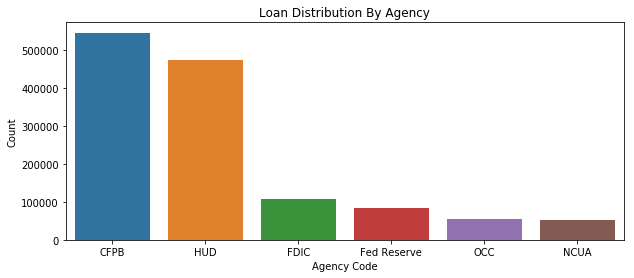

In [8]:
vc = merge_data['Agency_Code_Description'].value_counts()
plt.figure(figsize=(10,4))
sns.barplot(x=vc.index, y=vc.values)
plt.title('Loan Distribution By Agency')
plt.xlabel('Agency Code')
plt.ylabel('Count')
plt.show()

#### *Respondent ID*

In [9]:
merge_data.groupby(['As_of_Year','Agency_Code','Respondent_ID']).size().shape

(3459,)

There are 3459 distinctly identified respondents, though many loan issuers responded to FFIEC more than one year.

In [10]:
merge_data[['Agency_Code', 'Respondent_ID', 'Respondent_Name_TS', 'As_of_Year']].\
    groupby(['Agency_Code', 'Respondent_ID']). \
    filter(lambda row: row['Respondent_Name_TS'].nunique() > 1). \
    groupby(['Agency_Code', 'Respondent_ID', 'Respondent_Name_TS']).size().head()

Agency_Code  Respondent_ID  Respondent_Name_TS            
1            0000012229     NATIONAL BANK OF BLACKSBURG T/    245
                            NATIONAL BANK T/A NATIONAL BAN    128
             0000023216     BARRINGTON BANK & TRUST CO.NA     432
                            BARRINGTON BANK AND TRUST          89
             0000023850     CAPITAL BANK                      973
dtype: int64

Loan issuers may use different Respondent Names in different years. In later analysis, we will go with Respondent_ID and exclude Respondent_Name_TS in our analysis.

#### *Sequence Number*

In [11]:
merge_data['Sequence_Number'].unique()

array([  390,   422,   425, ..., 55809, 55995, 56479])

In [12]:
merge_data['Sequence_Number'].nunique()

403227

According to the definition, the Sequence Number serve as an identifier for an institution. It may not be too helpful as a variable directly. The only way it may help is that it implicitly indicate the order/time the data is archived.

#### *Loan Amount*

There are a few loans with amounts extremely large. They are very likely data entry errors, as given the applicants' income level, banks will not lend them 100 million dollars.

In [13]:
merge_data[['Loan_Amount_000', 'Applicant_Income_000']]. \
    sort_values('Loan_Amount_000', ascending=False).head()

,Loan_Amount_000,Applicant_Income_000
1320978,99625,33
1321003,99306,33
1321073,98285,32
557875,98279,32
1320882,97928,32


Apparently, the loan amount is way beyond the the the applicants' repaying capability and adjustments should be made. 

Let's assume that if the Loan Amount > \$1.4 million, or if Loan Amount > Applicant Income * 30, then the Loan_Amount is mis-entered and should be divided by 1000.

1. According to [Fannie Mae](https://www.fanniemae.com/singlefamily/loan-limits#) and its [historical loan limits](https://web.kamihq.com/web/viewer.html?source=extension_pdfhandler&file=https%3A%2F%2Fwww.fanniemae.com%2Fcontent%2Ffact_sheet%2Fhistorical-loan-limits.pdf) , the Maximum Loan Amount for  "high-cost" areas in the states (except Alaska, Guam, Hawaii, and the U.S. Virgin Islands) is \$1.4 million, so loan amount > \$1.4 milllion must be an error.
2. According to the 2013 [Guide to HMDA Reporting](https://web.kamihq.com/web/viewer.html?source=extension_pdfhandler&file=https%3A%2F%2Fwww.ffiec.gov%2Fhmda%2Fpdf%2F2013guide.pdf), *Appendix A, Section I.A.7 Loan Amount*, loans below \$500 do not need to report, thus only the entries in Loan_Amount_000 > 500 can be entry errors.
3. For applicants w/ legitimate income (> 2012 poverty threshold \$11k, according to [ASPE](https://aspe.hhs.gov/2012-hhs-poverty-guidelines)), if their loan amount cannot be paid back in 30 years given the applicant use all his/her income and charged zerorish interest rate, then the loan amount is highly likely an data entry error. Applicants with income lower than \$11k probably receive sponsorships from families/friends or have data entry errors.

In [14]:
# Convert strings to float
merge_data['Applicant_Income_000'] = merge_data['Applicant_Income_000']. \
    apply(lambda s: float(s) if s != 'NA  ' else float('nan'))

In [15]:
%%time
merge_data['Loan_Amount_000'] = merge_data.apply(lambda row: row['Loan_Amount_000']/1000 \
                                               if (row['Loan_Amount_000'] > 1400) \
                                                   or (row['Loan_Amount_000'] > 500 \
                                                       and row['Applicant_Income_000'] > 11 \
                                                       and row['Loan_Amount_000'] > 30*row['Applicant_Income_000']) \
                                                else row['Loan_Amount_000'], axis=1)

CPU times: user 36.7 s, sys: 507 ms, total: 37.2 s
Wall time: 37.2 s


In [16]:
# display highest loan amounts after handling
merge_data[['Loan_Amount_000', 'Applicant_Income_000']][merge_data['Loan_Amount_000'] > 1000].\
    sort_values('Loan_Amount_000', ascending=False).head()

,Loan_Amount_000,Applicant_Income_000
1249540,1400.0,484.0
917462,1400.0,428.0
730952,1400.0,414.0
1252005,1400.0,936.0
731015,1400.0,1866.0


There are Loan_Amount_000 close to 1400. It is not impossible that they are mis-entered, and we can further verify by checking their geographic location and see if they are ineligible for the "high-cost" limits. But since their amount is minimal, further handling are not necessary.

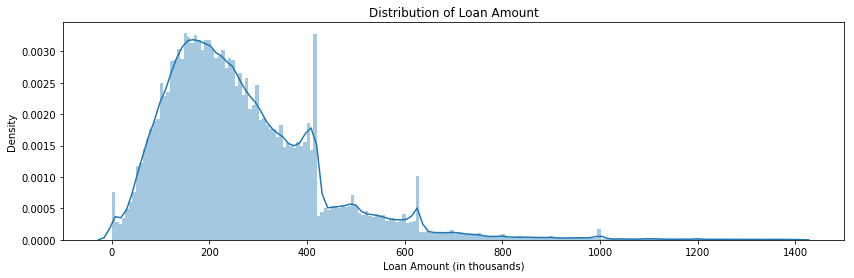

In [17]:
plt.figure(figsize=(14,4))
sns.distplot(merge_data['Loan_Amount_000'], hist=True, norm_hist=False, bins=200)
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount (in thousands)')
plt.ylabel('Density')
plt.show()

The peak is around \$200k, and most of loans are between \$100k and \$400k.

Another thing to notice is that, some loan amounts are zeros.

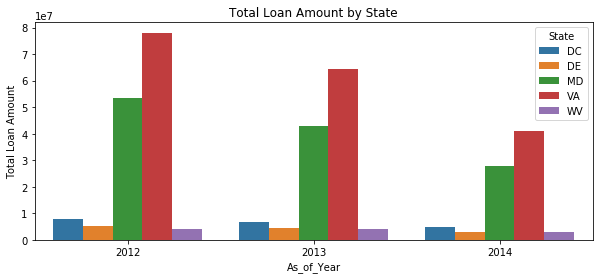

In [19]:
# Create a value count table by state and year
State_loan_amount = merge_data.groupby(['State', 'As_of_Year'])['Loan_Amount_000'].sum().reset_index()

plt.figure(figsize=(10,4))
sns.barplot(x='As_of_Year', y='Loan_Amount_000', data=State_loan_amount, hue='State')
plt.ylabel('Total Loan Amount')
plt.title('Total Loan Amount by State')
plt.show()

#### *Applicant Income*

In [22]:
merge_data[['Applicant_Income_000']].describe()

,Applicant_Income_000
count,1.203305e+06
mean,1.180193e+02
std,1.226957e+02
min,0.000000e+00
25%,6.000000e+01
50%,9.400000e+01
75%,1.420000e+02
max,9.999000e+03


The highest applicants have annual incomes close to \$10 million. The annual income of \$10k may not be more common than $10 million in clients.

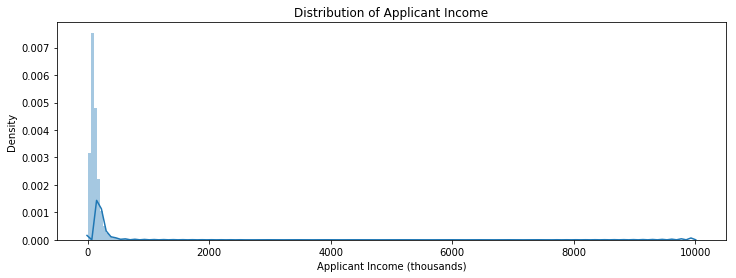

In [23]:
plt.figure(figsize=(12,4))
sns.distplot(merge_data['Applicant_Income_000'].dropna(), hist=True, norm_hist=False, bins=200)
plt.title('Distribution of Applicant Income')
plt.xlabel('Applicant Income (thousands)')
plt.ylabel('Density')
plt.show()

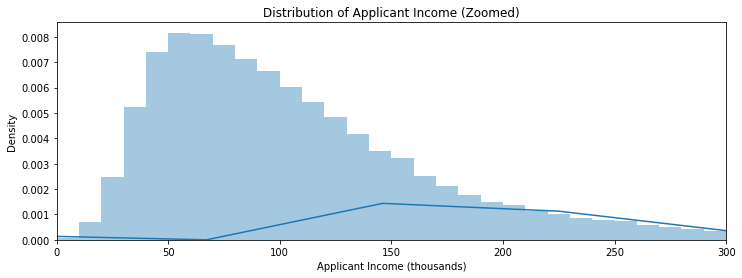

In [24]:
plt.figure(figsize=(12,4))
sns.distplot(merge_data['Applicant_Income_000'].dropna(), hist=True, norm_hist=False, bins=1000)
plt.title('Distribution of Applicant Income (Zoomed)')
plt.xlabel('Applicant Income (thousands)')
plt.ylabel('Density')
plt.xlim(0,300)
plt.show()

Most applicants have annual income between \$50k and \$200k.

#### *Loan Purpose*

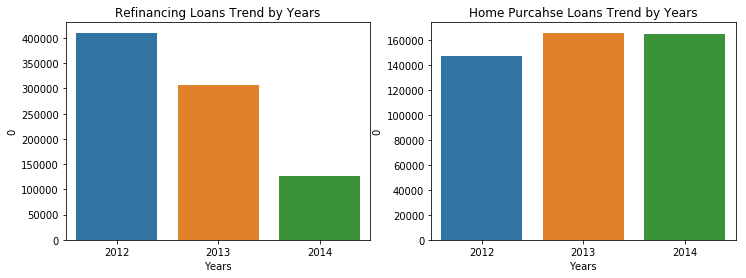

In [26]:
vc = merge_data[['Loan_Purpose_Description', 'As_of_Year']]. \
    groupby(['Loan_Purpose_Description', 'As_of_Year']).size().reset_index()
    
plt.figure(figsize=(12,4))

plt.subplot(121)
sns.barplot(x=vc[vc['Loan_Purpose_Description']=='Refinance']['As_of_Year'], y=vc[vc['Loan_Purpose_Description']=='Refinance'][0])
plt.xlabel('Years')
plt.title('Refinancing Loans Trend by Years')

plt.subplot(122)
sns.barplot(x=vc[vc['Loan_Purpose_Description']=='Purchase']['As_of_Year'], y=vc[vc['Loan_Purpose_Description']=='Purchase'][0])
plt.xlabel('Years')
plt.title('Home Purcahse Loans Trend by Years')

plt.show()

It is not hard to notice that the refinancing loans reduced significantly (69% decrease!), whereas loans for home purchase did not change as much. We need to dig deeper to find the reason of this decline in refinancing loans.

#### *State & County*
Respectively, State Code and County Code are the first 2 and last 3 digits of the 5-digit FIPS code in which the home was located. 

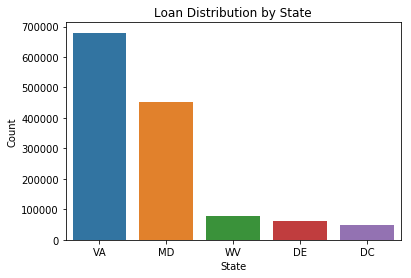

In [28]:
# Take a look at distribution by state
vc = merge_data['State'].value_counts()

sns.barplot(x=vc.index, y=vc.values)
plt.title('Loan Distribution by State')
plt.xlabel('State')
plt.ylabel('Count')
plt.show()

Virginia and Maryland contribute to most loans in year 2012-2014. Few borrowers in West Virginia, Delaware and D.C.

Let's look at how the #loans change from 2012 to 2014 in different states:

Text(0.5,1,'Number of Refinance and Purchase across States')

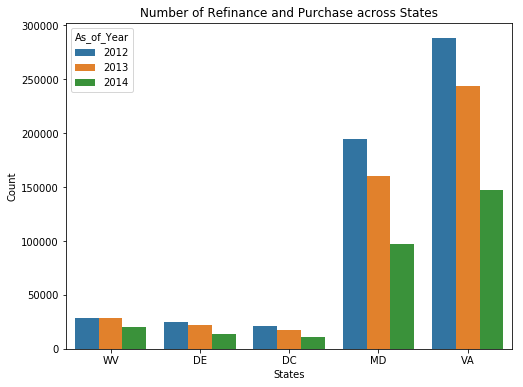

In [36]:
plt.figure(figsize=(8,6))
sns.countplot(x ='State', data=merge_data, hue='As_of_Year')
plt.ylabel('Count')
plt.xlabel('States')
plt.title('Number of Refinance and Purchase across States')

In all states, the # of refinancing loans decreased in similar scale, so the decrease may not be directly related to geographical factors.

In [30]:
merge_data['County_Code'].unique()

array(['079', '043', '039', '005', '015', '057', '003', '065', '099',
       '011', '061', '077', '107', '073', '105', '009', '029', '037',
       '069', '051', '027', '033', '083', '049', '097', '091', '017',
       '063', '007', '001', '053', '035', '075', '025', 'NA ', '095',
       '103', '085', '067', '013', '041', '101', '093', '045', '081',
       '019', '109', '021', '087', '089', '031', '071', '023', '055',
       '059', '047', '510', 13, 27, 25, 3, 5, 510, 35, 31, 21, 1, 43, 45,
       39, 17, 33, 9, 15, 37, 19, 41, 29, 47, 23, 11, '121', '155', '750',
       '540', '125', '143', '590', '165', '660', '191', '520', '169',
       '680', '515', '127', '760', '183', '149', '570', '670', '730',
       '036', '145', 85, 149, 87, 75, 760, 570, 36, 101, 127, 730, 49, 7,
       145, 53, 109, 670, 183, 97, 775, 67, 161, 770, 550, 810, 710, 199,
       735, 73, 700, 650, 93, 95, 830, 740, 800, 181, 115, 107, 59, 177,
       600, 153, 179, 61, 610, 187, 683, 685, 630, '153', '610', '685'

The County_Code is bit messy. We need to clean up before concatinating them with State_Code.

In [31]:
# Fill leading zeros
merge_data['County_Code'] = merge_data['County_Code'].apply(lambda row: str(row).zfill(3))
# Combine State Code and County Code
merge_data['FIPS_Code'] = merge_data['State_Code'].map(str) + merge_data['County_Code']
# Drop County Code as FIPS Code is created and County Code does not make sense without specifiying state
merge_data = merge_data.drop(columns=['County_Code'])

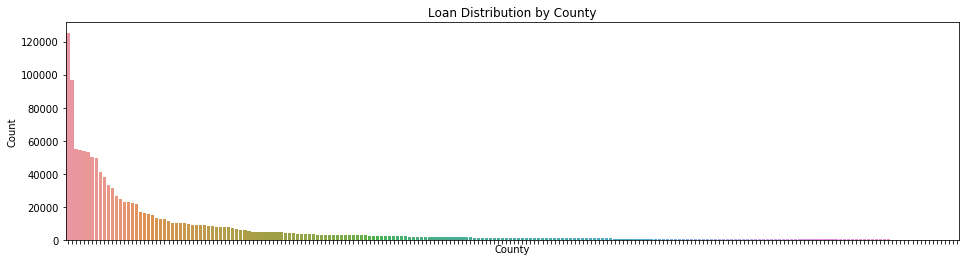

In [32]:
vc = merge_data['FIPS_Code'].value_counts().reset_index()
#vc['state'] = vc['index'].apply(lambda s: s[:2])

plt.figure(figsize=(16,4))
sns.barplot(x=vc['index'], y=vc['FIPS_Code'])#, hue=vc['state'])
plt.title('Loan Distribution by County')
plt.xlabel('County')
plt.ylabel('Count')
plt.tick_params(axis='x', labelbottom='off')
plt.show()

There are a few counties where significant amount of loans are issued. The high demand of loans in these counties may be cased by different factors. For example: 1)The population is higher in the county; 2) There are many newly built properties, which result in higher demand for home loans; 3) The people in the community heavily rely on loans.

In [34]:
# Create a value count table by FIPS Code
FIPS_count = merge_data.groupby(['FIPS_Code']).size().reset_index()

# Create a mask to filter out missing County Code 'NA '
mask = FIPS_count['FIPS_Code'].apply(lambda code: code[2:]) != 'NA '

fig = ff.create_choropleth(fips=FIPS_count[mask]['FIPS_Code'], 
                           values=FIPS_count[mask][0],
                           scope=['VA','MD','WV','DE','DC'],
                           legend_title='# of Loans', 
                           title='Home Loan Popularity in Virginia, Maryland, West Virginia, Delaware, DC')
py.iplot(fig, filename='choropleth of loan count in Virginia, Maryland, West Virginia, Delaware, DC')

The southwestern Virginia and West Virginia have relatively lower demand for home loans. The dark spot in the center of the graph is the George Washington and Jefferson National Forest. Larger cities, such as D.C., Baltimore, Richmond, have more demand for home loans.

Next, let's find which counties lost most loans from 2012 to 2014.

In [38]:
refinance_loans = merge_data[merge_data['Loan_Purpose_Description']=='Refinance']

# Calulate the #loans by FIPS_Code each year
FIPS_ycount = refinance_loans.groupby(['FIPS_Code', 'As_of_Year']).size()

# Calculate the percent change of #loans
FIPS_pctchange = pd.DataFrame([[code, \
                        100*(FIPS_ycount[code].iloc[-1] - FIPS_ycount[code].iloc[1]) / FIPS_ycount[code].iloc[1]] \
                            for code in FIPS_ycount.reset_index().FIPS_Code.unique()], \
                    columns=['FIPS_Code','Pct_Change'])

# Create a mask to filter out missing County Code 'NA '
mask = FIPS_pctchange['FIPS_Code'].apply(lambda code: code[2:]) != 'NA '

In [39]:
fig = ff.create_choropleth(fips=FIPS_pctchange[mask]['FIPS_Code'], 
                           values=FIPS_pctchange[mask]['Pct_Change'],
                           scope=['VA','MD','WV','DE','DC'],
                           legend_title='Percent Change', 
                           title='Percent Change of #home loans from 2012 to 2014 in Virginia, Maryland, West Virginia, Delaware, DC')
py.iplot(fig, filename='choropleth of loan count in Virginia, Maryland, West Virginia, Delaware, DC')

The lost businesses are mostly from the counties where home loans are popular (e.g. D.C., Baltimore, Richmond, etc).

In [40]:
# Create a value count table by FIPS Code
FIPS_count = merge_data.groupby(['FIPS_Code'])['Loan_Amount_000'].mean().reset_index()

# Create a mask to filter out missing County Code 'NA '
mask = FIPS_count['FIPS_Code'].apply(lambda code: code[2:]) != 'NA '

fig = ff.create_choropleth(fips=FIPS_count[mask]['FIPS_Code'], 
                           values=FIPS_count[mask]['Loan_Amount_000'],
                           scope=['VA','MD','WV','DE','DC'],
                           legend_title='Loan Mean', 
                           title='Home Loan Mean in Virginia, Maryland, West Virginia, Delaware, DC')
py.iplot(fig, filename='choropleth of loan mean in Virginia, Maryland, West Virginia, Delaware, DC')

Costal areas have higher means because the houses are more expensive and higher loans are needed.

#### *Loan Type Description*

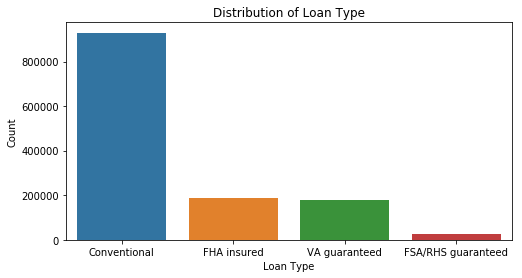

In [41]:
vc = merge_data['Loan_Type_Description'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(x=vc.index, y=vc.values)
plt.title('Distribution of Loan Type')
plt.xlabel('Loan Type')
plt.ylabel('Count')
plt.show()

Most loans are conventional. Only less than half are backed by a government-sponsored program.

Text(0.5,1,'Number of Loans by Loan Type in 2012 - 2014')

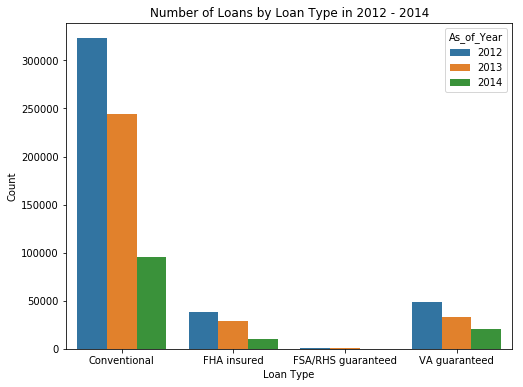

In [42]:
plt.figure(figsize=(8,6))
sns.countplot(x ='Loan_Type_Description', data=refinance_loans, hue='As_of_Year')
plt.ylabel('Count')
plt.xlabel('Loan Type')
plt.title('Number of Loans by Loan Type in 2012 - 2014')

The decline of refinance loans is across different loan types.

#### *Lien Status Description*
Lien position of the loan. If first lien position, then this loan carries the **least risk** if the borrower defaults because the lender has first claims to proceeds from the sale of a some. Subordinate liens carry **more risk** because they are paid after the lender for the first lien is paid.

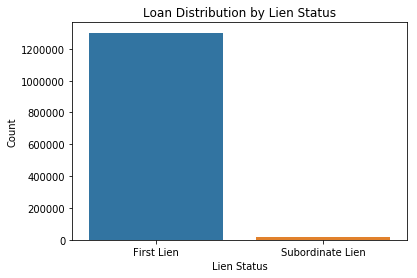

In [43]:
vc = merge_data['Lien_Status_Description'].value_counts()

sns.barplot(x=vc.index, y=vc.values)
plt.title('Loan Distribution by Lien Status')
plt.xlabel('Lien Status')
plt.ylabel('Count')
plt.show()

There are only ~20k loans of subordinate lien position, which is a fairly small amount compared to ~1300k loans of first lien position. The subordinate lien loans are more risky, so the small size of subordinate lien loans is good for business.

#### *Metropolitan Area Code*
The code designates a Metropolitan Statistical Area (MSA) / Metropolitan Division (MD) in which the home was located.

In [44]:
# Convert some non-strings to strings
merge_data['MSA_MD'] = merge_data['MSA_MD'].map(str)
merge_data['MSA_MD'].unique()

array(['16620', '19060', '25180', '26580', '34060', '37620', '44600',
       '47894', '48540', '49020', 'NA   ', '20100', '48864', '12580',
       '13644', '41540', '13980', '16820', '19260', '25500', '28700',
       '31340', '40060', '40220', '47260', '13220', '48260', '15680',
       '43524', '44420'], dtype=object)

We have 30 unique MSA/MD codes, which can serve as a categorical variable.

In [45]:
# Find relationship between MSA_MD and MSA_MD_Description
merge_data.groupby(['MSA_MD', 'MSA_MD_Description']).size()

MSA_MD  MSA_MD_Description                          
12580   BALTIMORE-COLUMBIA-TOWSON, MD                    45109
        BALTIMORE-TOWSON, MD                            161824
13220   BECKLEY, WV                                       1211
13644   BETHESDA-ROCKVILLE-FREDERICK, MD                 97900
13980   BLACKSBURG-CHRISTIANSBURG-RADFORD, VA             8138
15680   CALIFORNIA-LEXINGTON PARK, MD                     2166
16620   CHARLESTON, WV                                   13130
16820   CHARLOTTESVILLE, VA                              15195
19060   CUMBERLAND, MD-WV                                 4456
19260   DANVILLE, VA                                      2611
20100   DOVER, DE                                        11056
25180   HAGERSTOWN-MARTINSBURG, MD-WV                    17971
25500   HARRISONBURG, VA                                  6571
26580   HUNTINGTON-ASHLAND, WV-KY-OH                      6775
28700   KINGSPORT-BRISTOL-BRISTOL, TN-VA                  3924
31

The MSA_MD_Description sharing same MSA_MD code indicate the same metropolitan area. For example, *BALTIMORE-COLUMBIA-TOWSON, MD* and *BALTIMORE-TOWSON, MD* both indicate the Baltimore area, despite of their different name.

In [46]:
# Drop MSA_MD_Description column because of too many missing values and MSA_MD providing same info
merge_data = merge_data.drop(columns='MSA_MD_Description')

#### *Census Tract Number*
Identifier for the census tract in which the home was located.

In [47]:
# Convert some non-strings to strings
merge_data['Census_Tract_Number'] = merge_data['Census_Tract_Number'].map(str)
merge_data['Census_Tract_Number'].nunique()

3905

Census tracts are small statistical subdivisions of a county, so it makes sense that we have more Census Tract #'s. It can serve as a more specific geographic feature than FIPS code. It will contribute significantly if certain neighborhoods should be paid attention to.

#### *FFIEC Median Family Income*
Median family income for the MSA/MD in which the census tract is located

In [48]:
merge_data['FFIEC_Median_Family_Income'] = merge_data['FFIEC_Median_Family_Income'].\
    apply(lambda s: float(s) if s != 'NA      ' else float('nan'))

According to the definition of *FFIEC_Median_Family_Income*, it is the the median family income for each MSA. Given the years of the loans originated (As_of_Year), we are able to infer the missing values. 

In [49]:
# Select relevant columns
rel_cols = merge_data[['As_of_Year', 'MSA_MD', 'FFIEC_Median_Family_Income']]
# Select non-null rows to create a lookup table
rel_cols_nonnull = rel_cols[rel_cols['FFIEC_Median_Family_Income'].notnull()]
# Group the data by year and MSA code and get means (means only apply to MSA_MD==NA)
lookup_table = rel_cols_nonnull.groupby(['As_of_Year', 'MSA_MD'])['FFIEC_Median_Family_Income']. \
                    mean().to_frame().reset_index()
lookup_table.head()

,As_of_Year,MSA_MD,FFIEC_Median_Family_Income
0,2012,12580,85600.0
1,2012,13644,113400.0
2,2012,13980,60500.0
3,2012,16620,54900.0
4,2012,16820,77800.0


Now we have lookup table and will fill the missing values

In [50]:
# Select the rows w/ null values
mask = merge_data['FFIEC_Median_Family_Income'].isnull()

# Drop FFIEC_Median_Family_Income column prior to merging
pre_merge = merge_data[mask].drop(columns=['FFIEC_Median_Family_Income']).reset_index()

# Merge null rows w/ looked up FFIEC_Median_Family_Income
post_merge = pre_merge.merge(lookup_table, on=['As_of_Year', 'MSA_MD'], how='left').set_index('index')

# Concatinate non-null rows and null-handled rows
merge_data2 = merge_data[~mask].append(post_merge).sort_index()

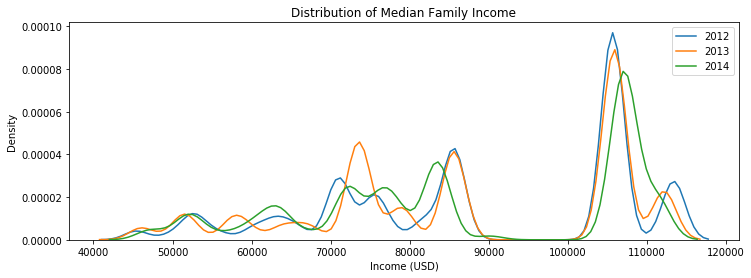

In [51]:
income_2012 = merge_data2[merge_data2['As_of_Year']==2012]['FFIEC_Median_Family_Income']
income_2013 = merge_data2[merge_data2['As_of_Year']==2013]['FFIEC_Median_Family_Income']
income_2014 = merge_data2[merge_data2['As_of_Year']==2014]['FFIEC_Median_Family_Income']

plt.figure(figsize=(12,4))
sns.distplot(income_2012, hist=False, label='2012')
sns.distplot(income_2013, hist=False, label='2013')
sns.distplot(income_2014, hist=False, label='2014')
plt.title('Distribution of Median Family Income')
plt.xlabel('Income (USD)')
plt.ylabel('Density')
plt.legend(loc='upper right')
plt.show()

#### *Tract to MSA MD Income Pct*
Percentage of the MSA/MD median Family income for the census tract, or $\frac{Family Income}{MSA Median Income}$

In [52]:
merge_data2['Tract_to_MSA_MD_Income_Pct'] = merge_data2['Tract_to_MSA_MD_Income_Pct']. \
    apply(lambda row: float(row) if row != 'NA    ' else float('nan'))

There are many null values in the Income_Pct column, which need to be dealt w/ before proceeding. We have three options:
1. Fill w/ 100
2. Fill w/ mean of all data
3. Fill w/ mean of local MSA data

For 1st option, it is arbitrary to assume the borrowers have same income level as everyone else, because of the fact that lenders only lend to people who meets certain requirements; for 3rd option, it is possible that some MSA area only have a small number of borrowers, which may result in biased means due to small sample. Therefore, we will go with 2nd option.

In [53]:
# Fill null values with mean
mean_pct = merge_data2['Tract_to_MSA_MD_Income_Pct'].mean()
merge_data2['Tract_to_MSA_MD_Income_Pct'] = merge_data2['Tract_to_MSA_MD_Income_Pct'].fillna(mean_pct)

# Create a new column Family Income with columns Median_Family_Income and Income_Pct
merge_data2['Family_Income'] = merge_data2['FFIEC_Median_Family_Income'] * \
                                merge_data2['Tract_to_MSA_MD_Income_Pct'] / 100

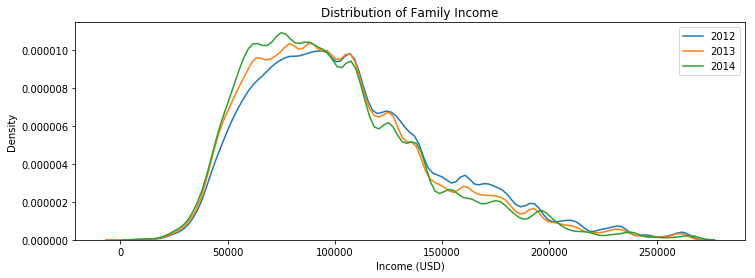

In [54]:
plt.figure(figsize=(12,4))
sns.distplot(merge_data2['Family_Income'][merge_data2.As_of_Year==2012], hist=False, label='2012')
sns.distplot(merge_data2['Family_Income'][merge_data2.As_of_Year==2013], hist=False, label='2013')
sns.distplot(merge_data2['Family_Income'][merge_data2.As_of_Year==2014], hist=False, label='2014')
plt.title('Distribution of Family Income')
plt.xlabel('Income (USD)')
plt.ylabel('Density')
plt.show()

#### *Number of Owner Occupied Units*
Number of units, in the census tract and including condominiums, in which the owner lives

In [55]:
# Convert strings to numbers
merge_data2['Number_of_Owner_Occupied_Units'] = merge_data2['Number_of_Owner_Occupied_Units']. \
    apply(lambda s: float(s) if s != 'NA      ' else float('nan'))

# Find num of nulls
merge_data2['Number_of_Owner_Occupied_Units'].isnull().sum()

1874

There are 1874 nulls out of 1.3 million data points.

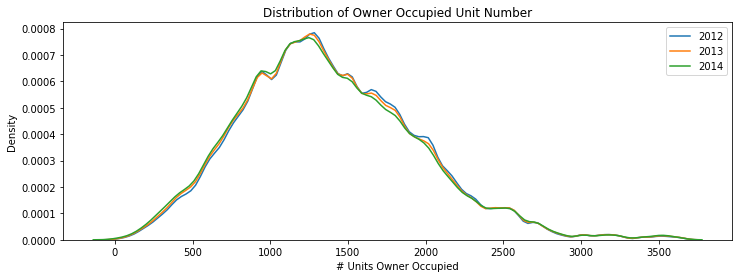

In [56]:
plt.figure(figsize=(12,4))
sns.distplot(merge_data2['Number_of_Owner_Occupied_Units'][merge_data2.As_of_Year==2012].dropna(), hist=False, label='2012')
sns.distplot(merge_data2['Number_of_Owner_Occupied_Units'][merge_data2.As_of_Year==2013].dropna(), hist=False, label='2013')
sns.distplot(merge_data2['Number_of_Owner_Occupied_Units'][merge_data2.As_of_Year==2014].dropna(), hist=False, label='2014')
plt.title('Distribution of Owner Occupied Unit Number')
plt.xlabel('# Units Owner Occupied')
plt.ylabel('Density')
plt.show()

#### *Conforming Limit & Status*
Conforming Limit: Single Unit Conforming Loan limit for the given county;

Conforming Status: 'Conforming' for loans with amounts less than their county's respective conforming loan limit. "Jumbo" if the loan amount exceeds the county limit

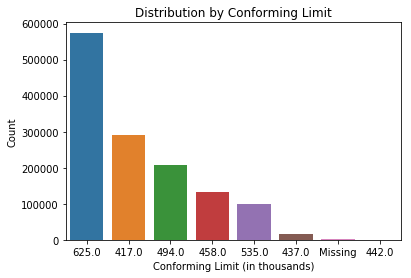

In [57]:
merge_data2['Conforming_Limit_000'].fillna('Missing', inplace=True)
vc = merge_data2['Conforming_Limit_000'].value_counts()

sns.barplot(x=vc.index, y=vc.values)
plt.xlabel('Conforming Limit (in thousands)')
plt.ylabel('Count')
plt.title('Distribution by Conforming Limit')
plt.show()

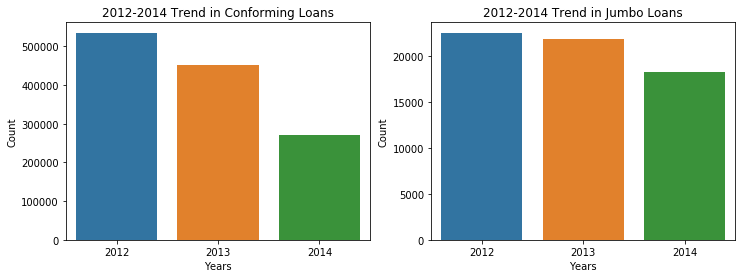

In [58]:
vc = merge_data2[['Conforming_Status', 'As_of_Year']]. \
    groupby(['Conforming_Status', 'As_of_Year']).size().reset_index()
    
plt.figure(figsize=(12,4))

plt.subplot(121)
sns.barplot(x=vc[vc['Conforming_Status']=='Conforming']['As_of_Year'], y=vc[vc['Conforming_Status']=='Conforming'][0])
plt.xlabel('Years')
plt.ylabel('Count')
plt.title('2012-2014 Trend in Conforming Loans')

plt.subplot(122)
sns.barplot(x=vc[vc['Conforming_Status']=='Jumbo']['As_of_Year'], y=vc[vc['Conforming_Status']=='Jumbo'][0])
plt.xlabel('Years')
plt.ylabel('Count')
plt.title('2012-2014 Trend in Jumbo Loans')

plt.show()

The Conforming loans decrease more rapidly than Jumbo loans. It is worth noticing because the size of Conforming loans is much greater than Jumbo loans.

In [59]:
conform_count = merge_data2.groupby(['Conforming_Limit_000','Conforming_Status']).size()
# Change: groupby state_office and divide by sum
conform_pcts = conform_count.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

# Print the percent of conforming status
count_pcts = conform_count.to_frame().reset_index(). \
    merge(conform_pcts.to_frame().reset_index(), how='outer', on=['Conforming_Limit_000','Conforming_Status'])
count_pcts = count_pcts.set_index(['Conforming_Limit_000','Conforming_Status'])
count_pcts.columns = ['Count', 'Percent']
count_pcts

Count     Percent
Conforming_Limit_000 Conforming_Status                    
417.0                Conforming         285278   98.421274
                     Jumbo                4576    1.578726
437.0                Conforming          14280   94.531974
                     Jumbo                 826    5.468026
442.0                Conforming            509   93.738490
                     Jumbo                  34    6.261510
458.0                Conforming         129491   97.194305
                     Jumbo                3738    2.805695
494.0                Conforming         194682   94.070180
                     Jumbo               12272    5.929820
535.0                Conforming          98492   98.501850
                     Jumbo                1498    1.498150
625.0                Conforming         535819   93.243481
                     Jumbo               38826    6.756519
Missing              Jumbo                 837  100.000000

#### *Conventional Status*
Boolean value indicating whether loan is conventional

In [60]:
vc = merge_data2[['Conventional_Status', 'As_of_Year']]. \
    groupby(['Conventional_Status', 'As_of_Year']).size().reset_index()

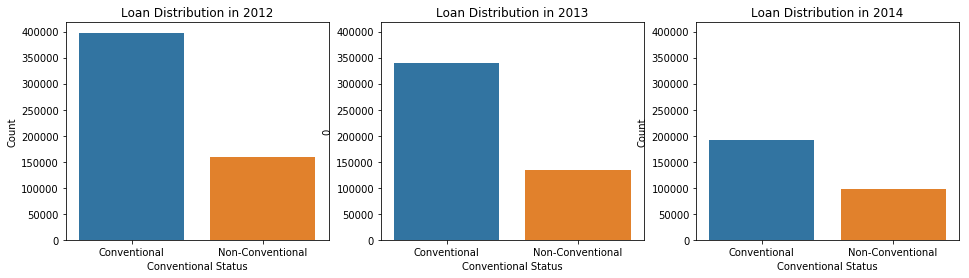

In [61]:
plt.figure(figsize=(16,4))

plt.subplot(131)
ax = sns.barplot(x=vc[vc['As_of_Year']==2012]['Conventional_Status'], y=vc[vc['As_of_Year']==2012][0])
plt.xlabel('Conventional Status')
plt.ylabel('Count')
plt.title('Loan Distribution in 2012')

plt.subplot(132, sharey=ax)
sns.barplot(x=vc[vc['As_of_Year']==2013]['Conventional_Status'], y=vc[vc['As_of_Year']==2013][0])
plt.xlabel('Conventional Status')
plt.title('Loan Distribution in 2013')

plt.subplot(133, sharey=ax)
sns.barplot(x=vc[vc['As_of_Year']==2014]['Conventional_Status'], y=vc[vc['As_of_Year']==2014][0])
plt.xlabel('Conventional Status')
plt.ylabel('Count')
plt.title('Loan Distribution in 2014')
plt.show()

#### *Conventional Conforming Flag*
'Y' if Conventional_Status is "Conventional" and "Conforming_Status" is "Conforming"

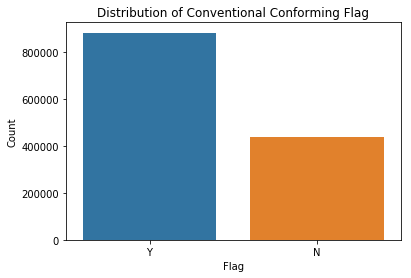

In [62]:
vc = merge_data2['Conventional_Conforming_Flag'].value_counts()

sns.barplot(x=vc.index, y=vc.values)
plt.xlabel('Flag')
plt.ylabel('Count')
plt.title('Distribution of Conventional Conforming Flag')
plt.show()

#### *Respondent*
Companies which originated the loans

In [63]:
# Get value counts by Respondent
vc = merge_data2['Respondent_Name_TS'].value_counts().reset_index()

# Group less common respondents together as "Other"
vc.loc[vc.Respondent_Name_TS < 15000, 'index'] = 'Other'

# Calculate total frequency for "Other"
vc2 = vc.groupby('index').sum().sort_values('Respondent_Name_TS')

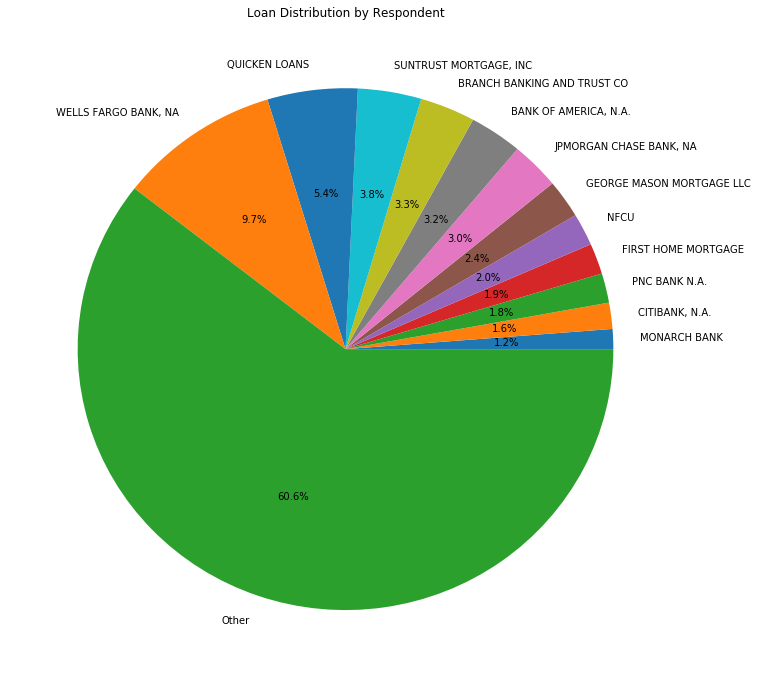

In [64]:
plt.figure(figsize=(12,12))
plt.pie(vc2.values, labels=vc2.index, autopct='%1.1f%%')
plt.title('Loan Distribution by Respondent')
plt.show()

In years 2012 to 2014, Wells Fargo is the largest respondent which originated almost 10% of all loans; Quicken Loans contribtued more than 5% of the loans; Suntrust, Branch, BOA and JPM also provided more than 3% of the HDMA data.

## Recent data
With necessary filters, we get the data from [online HMDA tool](https://www.consumerfinance.gov/data-research/hmda/explore#!/as_of_year=2017,2016,2015&state_code-1=51&state_code-2=54&state_code-3=11&state_code-4=10&state_code-5=24&property_type=1&owner_occupancy=1&action_taken=1&loan_purpose=1,3&lien_status=1,2&section=filters) in year 2015-2017. Let's take a look how the loan distributions change in later years.

In [65]:
recent_data = pd.read_csv('/Users/nzhang/OneDrive/Data/capital_one_data_challenge/hmda_lar_2015_to_2017.csv', low_memory=False)

In [66]:
recent_data.columns

Index(['tract_to_msamd_income', 'rate_spread', 'population',
       'minority_population', 'number_of_owner_occupied_units',
       'number_of_1_to_4_family_units', 'loan_amount_000s',
       'hud_median_family_income', 'applicant_income_000s', 'state_name',
       'state_abbr', 'sequence_number', 'respondent_id', 'purchaser_type_name',
       'property_type_name', 'preapproval_name', 'owner_occupancy_name',
       'msamd_name', 'loan_type_name', 'loan_purpose_name', 'lien_status_name',
       'hoepa_status_name', 'edit_status_name', 'denial_reason_name_3',
       'denial_reason_name_2', 'denial_reason_name_1', 'county_name',
       'co_applicant_sex_name', 'co_applicant_race_name_5',
       'co_applicant_race_name_4', 'co_applicant_race_name_3',
       'co_applicant_race_name_2', 'co_applicant_race_name_1',
       'co_applicant_ethnicity_name', 'census_tract_number', 'as_of_year',
       'application_date_indicator', 'applicant_sex_name',
       'applicant_race_name_5', 'applicant_rac

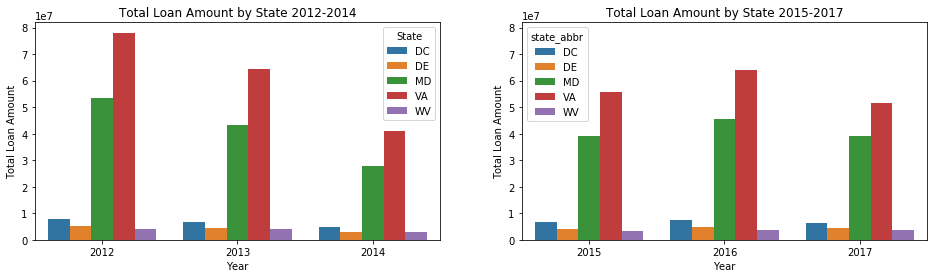

In [67]:
# Create a value count table by state and year
State_loan_amount1 = merge_data2.groupby(['State', 'As_of_Year'])['Loan_Amount_000'].sum().reset_index()
State_loan_amount2 = recent_data.groupby(['state_abbr','as_of_year'])['loan_amount_000s'].sum().reset_index()

plt.figure(figsize=(16,4))

plt.subplot(121)
ax = sns.barplot(x='As_of_Year', y='Loan_Amount_000', data=State_loan_amount1, hue='State')
plt.xlabel('Year')
plt.ylabel('Total Loan Amount')
plt.title('Total Loan Amount by State 2012-2014')

plt.subplot(122, sharey=ax)
sns.barplot(x='as_of_year', y='loan_amount_000s', data=State_loan_amount2, hue='state_abbr')
plt.xlabel('Year')
plt.ylabel('Total Loan Amount')
plt.title('Total Loan Amount by State 2015-2017')
plt.show()

As shown above, although we saw a decreasing trend from 2012 to 2014, the total loan amount went back up in 2015 and staied consistent in following two years. Thus, the decline in total loan amount in 2014 is temporary, and might be caused by macro economy. It is a positive signal for Change Financial to keep operating in these states.

## Final Thoughts
1. The shrink of the home loan market in 2014 is temporary. Change Financial should keep its presence in the states.
2. The change of home loan market is more significant in metropolitan areas (eg. D.C., Baltimore, and Richmond). Volatility means opportunity. If Change Financial can seize the opportunity when market recover, it is easier to expand its business than competing for customers in stable market.
3. Change Financial should pay attention to the coastal area, where people have higher demand for loans and higher income to pay back.
4. Change Financial can make more effective marketing strategy by obtaining additional data. For example, Change Financial can target the declined applicants, whose risk is controllable and willing to accept higher interest rates （the dark area above line B in the graph below; or partner with real estate service companies (like Zillow) and be the 1st to connect w/ clients who may have needs to home loans.

![image](https://www.lendingmemo.com/wp-content/uploads/2015/02/P2P-Picks-algorithm-for-Lending-Club.png)